# House Prices
Predict sales prices and practice

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.tabular import *
from fastai.metrics import error_rate
import pandas as pd

In [3]:
path = Config.data_path()/'house-prices'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/Users/kuptservol/.fastai/data/house-prices')

In [4]:
! kaggle competitions download -c house-prices-advanced-regression-techniques -p {path} 

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! ls {path}

data_description.txt  test.csv
sample_submission.csv train.csv


In [183]:
train_csv_pd = pd.read_csv(path/'train.csv'); train_csv_pd.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [111]:
test_csv_pd = pd.read_csv(path/'test.csv'); test_csv_pd.head().T

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [184]:
len(train_csv_pd),len(test_csv_pd)

(1460, 1459)

In [185]:
procs=[FillMissing, Categorify, Normalize]

In [186]:
cat_vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
            'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
            'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
            'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
           'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 
           'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
# todo: year to cont?

In [187]:
cont_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [188]:
dep_var = 'SalePrice'
df = train_csv_pd[cat_vars + cont_vars + [dep_var]].copy()

In [189]:
test_csv_pd['BsmtFinSF1'].head()

0    468.0
1    923.0
2    791.0
3    602.0
4    263.0
Name: BsmtFinSF1, dtype: float64

In [235]:
test_csv_pd[test_csv_pd['GarageArea'].isnull()]['BsmtHalfBath']

1116    0.0
Name: BsmtHalfBath, dtype: float64

In [191]:
test_csv_pd[test_csv_pd['BsmtFinSF2'].isnull()]['BsmtFinSF2']

Series([], Name: BsmtFinSF2, dtype: float64)

In [193]:
test_csv_pd[test_csv_pd['BsmtUnfSF'].isnull()]['BsmtUnfSF']

Series([], Name: BsmtUnfSF, dtype: float64)

660 test row is strange - replacing it

In [236]:
test_csv_pd['GarageArea'][1116] = test_csv_pd['GarageArea'][0]

/Users/kuptservol/miniconda2/envs/fastai-1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Transform check

In [224]:
n = len(train_csv_pd); n

1460

In [69]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_csv_pd.iloc[idx[:1000]]
small_cont_vars = ['LotFrontage', 'LotArea', 'GarageCars']
small_cat_vars =  ['MSSubClass', 'Street', 'YearBuilt', 'Alley']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['SalePrice']]

In [70]:
small_train_df.head()

,MSSubClass,Street,YearBuilt,Alley,LotFrontage,LotArea,GarageCars,SalePrice
0,60,Pave,2003,NaN,65.0,8450,2,208500
1,20,Pave,1976,NaN,80.0,9600,2,181500
2,60,Pave,2001,NaN,68.0,11250,2,223500
3,70,Pave,1915,NaN,60.0,9550,3,140000
4,60,Pave,2000,NaN,84.0,14260,3,250000


In [71]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)

In [72]:
small_train_df.head()

,MSSubClass,Street,YearBuilt,Alley,LotFrontage,LotArea,GarageCars,SalePrice
0,60,Pave,2003,NaN,65.0,8450,2,208500
1,20,Pave,1976,NaN,80.0,9600,2,181500
2,60,Pave,2001,NaN,68.0,11250,2,223500
3,70,Pave,1915,NaN,60.0,9550,3,140000
4,60,Pave,2000,NaN,84.0,14260,3,250000


In [76]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)

In [77]:
small_train_df.head()

,MSSubClass,Street,YearBuilt,Alley,LotFrontage,LotArea,GarageCars,SalePrice,LotFrontage_na
0,60,Pave,2003,NaN,-0.213564,-0.196376,0.316206,208500,False
1,20,Pave,1976,NaN,0.432913,-0.095611,0.316206,181500,False
2,60,Pave,2001,NaN,-0.084269,0.048965,0.316206,223500,False
3,70,Pave,1915,NaN,-0.429056,-0.099992,1.661761,140000,False
4,60,Pave,2000,NaN,0.605306,0.312707,1.661761,250000,False


In [75]:
normalize = Normalize(small_cat_vars, small_cont_vars)
normalize(small_train_df)

In [74]:
small_train_df.head()

,MSSubClass,Street,YearBuilt,Alley,LotFrontage,LotArea,GarageCars,SalePrice
0,60,Pave,2003,NaN,-0.213564,-0.196376,0.316206,208500
1,20,Pave,1976,NaN,0.432913,-0.095611,0.316206,181500
2,60,Pave,2001,NaN,-0.084269,0.048965,0.316206,223500
3,70,Pave,1915,NaN,-0.429056,-0.099992,1.661761,140000
4,60,Pave,2000,NaN,0.605307,0.312707,1.661761,250000


Make validation split by year+month

In [225]:
test_csv_pd['YrSold_MoSold']=test_csv_pd['YrSold']+test_csv_pd['MoSold']
train_csv_pd['YrSold_MoSold']=test_csv_pd['YrSold']+test_csv_pd['MoSold']

In [226]:
test_csv_pd['YrSold_MoSold'].min(),test_csv_pd['YrSold_MoSold'].max()

(2007.0, 2021.0)

In [227]:
cut = train_csv_pd[train_csv_pd['YrSold_MoSold']>2016].index
cut

Int64Index([ 118,  135,  164,  167,  169,  171,  173,  175,  178,  179,
            ...
            1367, 1382, 1400, 1419, 1424, 1435, 1442, 1445, 1452, 1458],
           dtype='int64', length=243)

In [228]:
len(cut)

243

In [229]:
valid_idx = cut

In [230]:
df[dep_var].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Dep var is int - so to make it a regression problem but not a categorisation - make it float

In [260]:
# todo: log=True ?
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_csv_pd, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [261]:
data.save('data-0-log')

In [ ]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [265]:
max_log_y = np.log(np.max(train_csv_pd['SalePrice'])*1.2)
max_log_y

13.716794585025117

In [266]:
min_log_y = np.log(np.min(train_csv_pd['SalePrice'])*0.8)
min_log_y

10.237098556876308

In [267]:
y_range = torch.tensor([min_log_y, max_log_y], device=defaults.device)
y_range

tensor([10.2371, 13.7168])

In [268]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=rmse)


In [269]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(16, 8)
    (1): Embedding(6, 4)
    (2): Embedding(3, 3)
    (3): Embedding(3, 3)
    (4): Embedding(5, 4)
    (5): Embedding(5, 4)
    (6): Embedding(3, 3)
    (7): Embedding(6, 4)
    (8): Embedding(4, 3)
    (9): Embedding(26, 10)
    (10): Embedding(9, 5)
    (11): Embedding(7, 5)
    (12): Embedding(6, 4)
    (13): Embedding(9, 5)
    (14): Embedding(11, 6)
    (15): Embedding(9, 5)
    (16): Embedding(110, 22)
    (17): Embedding(62, 16)
    (18): Embedding(7, 5)
    (19): Embedding(9, 5)
    (20): Embedding(16, 8)
    (21): Embedding(16, 8)
    (22): Embedding(5, 4)
    (23): Embedding(5, 4)
    (24): Embedding(6, 4)
    (25): Embedding(7, 5)
    (26): Embedding(5, 4)
    (27): Embedding(5, 4)
    (28): Embedding(5, 4)
    (29): Embedding(7, 5)
    (30): Embedding(7, 5)
    (31): Embedding(7, 5)
    (32): Embedding(6, 4)
    (33): Embedding(3, 3)
    (34): Embedding(6, 4)
    (35): Embedding(5, 4)
    (36): Embedding(7, 5)

In [270]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


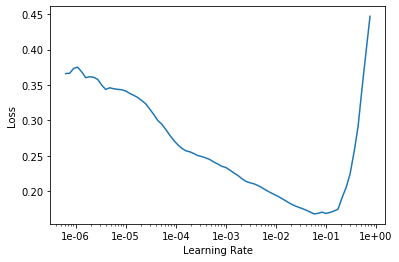

In [271]:
learn.recorder.plot()

In [272]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.157438,0.184905,0.429070,00:01
1,0.104723,0.107421,0.327269,00:01
2,0.076232,0.059989,0.237465,00:01
3,0.055840,0.037275,0.187861,00:01
4,0.042762,0.037162,0.187835,00:01


In [273]:
learn.fit_one_cycle(10, 1e-4, wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.019186,0.036604,0.186335,00:07
1,0.019054,0.037217,0.187165,00:04
2,0.018196,0.034594,0.180279,00:03
3,0.016519,0.032710,0.174673,00:02
4,0.015360,0.032864,0.174479,00:02
5,0.015921,0.032208,0.173128,00:02
6,0.015625,0.033838,0.177933,00:02
7,0.015092,0.033226,0.176612,00:01
8,0.014434,0.033018,0.176231,00:01
9,0.014249,0.033690,0.177804,00:01


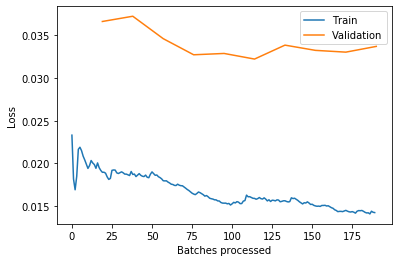

In [274]:
learn.recorder.plot_losses()

In [275]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.012327,0.030698,0.167856,00:01
1,0.013570,0.033631,0.176907,00:02
2,0.014072,0.045299,0.204463,00:02
3,0.013059,0.030925,0.170679,00:01
4,0.013000,0.033302,0.177927,00:02


In [277]:
learn.fit_one_cycle(20, 3e-4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.011244,0.030939,0.169654,00:03
1,0.009541,0.034042,0.179253,00:03
2,0.009850,0.036502,0.186332,00:02
3,0.009443,0.041055,0.196082,00:03
4,0.009907,0.030678,0.170632,00:03
5,0.010787,0.033551,0.177482,00:02
6,0.012049,0.032705,0.177327,00:02
7,0.011488,0.032905,0.174981,00:03
8,0.011014,0.038043,0.188169,00:02
9,0.010834,0.030971,0.170957,00:02


In [281]:
test_preds=learn.get_preds(DatasetType.Test)
test_csv_pd["SalePrice"]=np.exp(test_preds[0].data).numpy().T[0]
test_csv_pd[["Id","SalePrice"]]=test_csv_pd[["Id","SalePrice"]].astype("int")
test_csv_pd[["Id","SalePrice"]].to_csv(path/"submission.csv",index=False)

In [282]:
! kaggle competitions submit house-prices-advanced-regression-techniques -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 17.0k/17.0k [00:10<00:00, 1.73kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques